In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from google.colab import drive
# drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dengue_features_train=pd.read_csv('dengue_features_train.csv')
dengue_labels_train= pd.read_csv('dengue_labels_train.csv')


# dengue_features_train = pd.read_csv('/content/gdrive/My Drive/Foundation Of DataScience/Final Project/Final Project/dengue_features_train.csv')
# dengue_labels_train = pd.read_csv('/content/gdrive/My Drive/Foundation Of DataScience/Final Project/Final Project/dengue_labels_train.csv')
dengue_features_train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [35]:
dengue_labels_train.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [0]:
# Join the training features and Labale to analysing them

new_train_set = pd.merge(dengue_features_train,dengue_labels_train, how='left', left_on =['city','year','weekofyear'], right_on=['city','year','weekofyear'])

In [0]:
type(new_train_set)

pandas.core.frame.DataFrame

In [0]:
new_train_set.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [0]:
# check the columns name
new_train_set.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [0]:
corr_matrix = new_train_set.corr()
corr_matrix["total_cases"].sort_values(ascending=False)

total_cases                              1.000000
reanalysis_min_air_temp_k                0.325252
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_specific_humidity_g_per_kg    0.129861
station_avg_temp_c                       0.116109
reanalysis_precip_amt_kg_per_m2         -0.010031
precipitation_amt_mm                    -0.038740
reanalysis_sat_precip_amt_mm            -0.038740
station_max_temp_c                      -0.039219
station_precip_mm                       -0.074374
reanalysis_relative_humidity_percent    -0.132452
ndvi_se                                 -0.168612
reanalysis_max_air_temp_k               -0.191345
ndvi_sw                                 -0.196461
ndvi_nw                                 -0.202235
station_diur_temp_rng_c                 -0.237844


In [0]:
#remove duplcates, subset, keep, etc.
new_train_set.drop_duplicates()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


# removing the NULL values

In [0]:
new_train_set.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [0]:
# Deal with NULL values
# I used avarage value for temperater feature to fill the NULL values

# replacing na values with previeus value  with limitation of 3 days 
new_train_set['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['station_diur_temp_rng_c'].fillna(method='ffill',inplace=True)
new_train_set['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
new_train_set['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
new_train_set['reanalysis_avg_temp_k'].fillna(new_train_set['reanalysis_avg_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_dew_point_temp_k'].fillna(new_train_set['reanalysis_dew_point_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_max_air_temp_k'].fillna(new_train_set['reanalysis_max_air_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_min_air_temp_k'].fillna(new_train_set['reanalysis_min_air_temp_k'].mean(),inplace=True)
new_train_set['reanalysis_precip_amt_kg_per_m2'].fillna(new_train_set['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
new_train_set['reanalysis_sat_precip_amt_mm'].fillna(new_train_set['reanalysis_sat_precip_amt_mm'].mean(),inplace=True)
new_train_set['reanalysis_specific_humidity_g_per_kg'].fillna(new_train_set['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
new_train_set['station_avg_temp_c'].fillna(new_train_set['station_avg_temp_c'].mean(),inplace=True)
new_train_set['station_min_temp_c'].fillna(new_train_set['station_min_temp_c'].mean(),inplace=True)
new_train_set['station_max_temp_c'].fillna(new_train_set['station_max_temp_c'].mean(),inplace=True)
new_train_set['station_precip_mm'].fillna(new_train_set['station_precip_mm'].mean(),inplace=True)
new_train_set['precipitation_amt_mm'].fillna(new_train_set['precipitation_amt_mm'].mean(),inplace=True)
new_train_set['reanalysis_relative_humidity_percent'].fillna(new_train_set['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
new_train_set['ndvi_nw'].fillna(new_train_set['ndvi_nw'].mean(),inplace=True)
new_train_set['ndvi_se'].fillna(new_train_set['ndvi_se'].mean(),inplace=True)
new_train_set['ndvi_sw'].fillna(new_train_set['ndvi_sw'].mean(),inplace=True)
new_train_set['ndvi_ne'].fillna(new_train_set['ndvi_ne'].mean(),inplace=True)

In [0]:
new_train_set.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

Text(0.5, 1.0, 'corr_matrix')

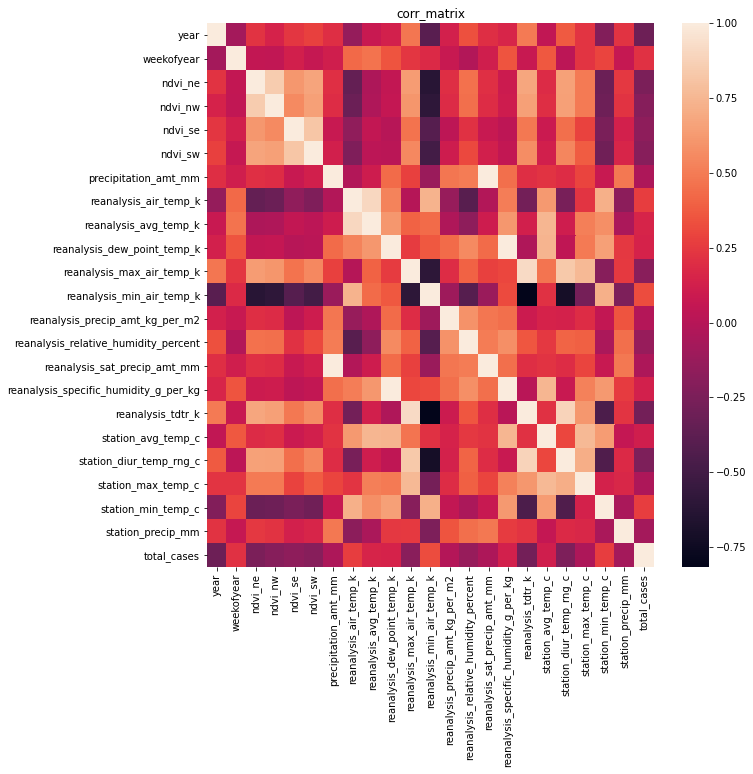

In [0]:
# plot san juan
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sj_corr_heat = sns.heatmap(corr_matrix, ax=ax)
plt.title('corr_matrix')

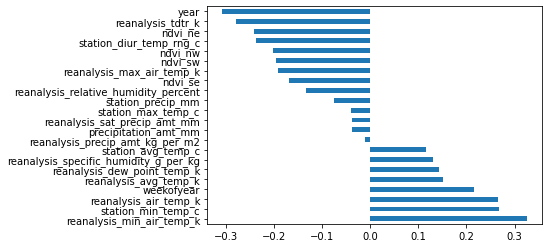

In [0]:
# San Juan
(corr_matrix
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

The wetter the better</br>
The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. This makes sense: we know mosquitos thrive wet climates, the wetter the better!


# Analysing the features based on the TOTAL CASEES on whole the data

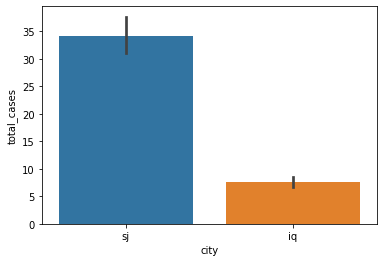

In [0]:
sns.barplot(x='city',y='total_cases',data=new_train_set)

It is clear that the number of Total Cases in sj is higher that iq city

#Convert date to YEAR,MONTH ,DAY

In [0]:
new_df = new_train_set.copy()

new_df['week_start_date']=pd.to_datetime(new_df['week_start_date'])
new_df['DATE_year']= new_df['week_start_date'].map(lambda x: x.strftime('%Y'))
new_df['DATE_Month']=new_df['week_start_date'].map(lambda x:x.strftime('%B'))
new_df['DATE_Day']=new_df['week_start_date'].map(lambda x:x.strftime('%A'))

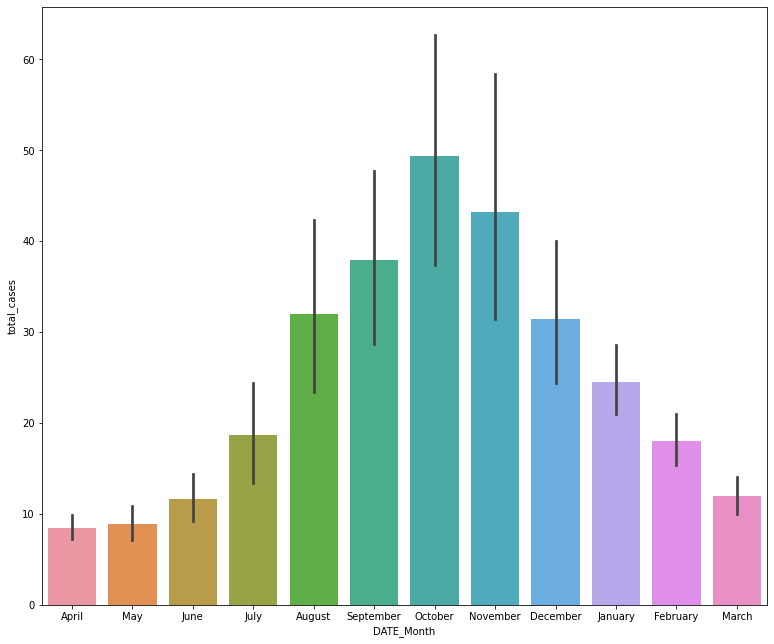

In [0]:
plt.figure(figsize= [13,15])

sns.barplot(x='DATE_Month',y='total_cases',data=new_df,)

it is clear that during the summertime the total cases of diseases are increasing which shows that there is a strong correlation with temperature and total cases. 

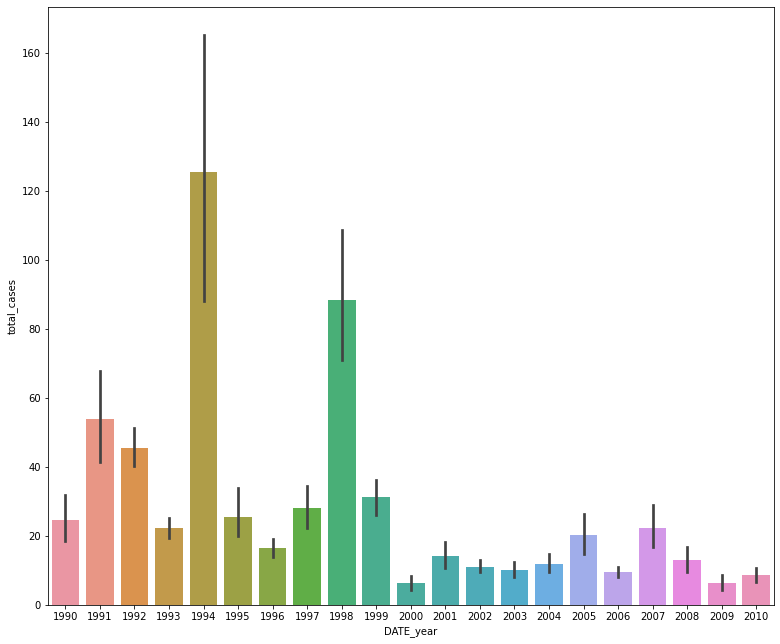

In [0]:
plt.figure(figsize= [13,11])
sns.barplot(x='DATE_year',y='total_cases',data=new_df,)

in 1994 and 1998 the total cases had its highes value

In [0]:
pip install plotly

# Doing same analysis on the each individual city

In [0]:
df_sj = new_train_set[new_train_set["city"] == "sj"] #dataset for San Juan
df_iq = new_train_set[new_train_set["city"] == "iq"] #dataset for Iquitos

In [0]:
df_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [0]:
# Replace nulls in df_sj

# replacing na values with previous value  with limitation of 3 days 
df_sj['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_sj['precipitation_amt_mm'].fillna(df_sj['precipitation_amt_mm'].mean(),inplace=True)
df_sj['reanalysis_avg_temp_k'].fillna(df_sj['reanalysis_avg_temp_k'].mean(),inplace=True)
df_sj['reanalysis_dew_point_temp_k'].fillna(df_sj['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_sj['reanalysis_max_air_temp_k'].fillna(df_sj['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_min_air_temp_k'].fillna(df_sj['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_precip_amt_kg_per_m2'].fillna(df_sj['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_sj['reanalysis_relative_humidity_percent'].fillna(df_sj['reanalysis_relative_humidity_percent'].mean(),inplace=True)
df_sj['reanalysis_sat_precip_amt_mm'].fillna(df_sj['reanalysis_sat_precip_amt_mm'].mean(),inplace=True)
df_sj['reanalysis_specific_humidity_g_per_kg'].fillna(df_sj['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_sj['station_avg_temp_c'].fillna(df_sj['station_avg_temp_c'].mean(),inplace=True)
df_sj['station_min_temp_c'].fillna(df_sj['station_min_temp_c'].mean(),inplace=True)
df_sj['station_max_temp_c'].fillna(df_sj['station_max_temp_c'].mean(),inplace=True)
df_sj['station_precip_mm'].fillna(df_sj['station_precip_mm'].mean(),inplace=True)




# fill nul values with the next value
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

* There are still NaNs in the dataset. Since the number of NaN records remaining is immaterial, to fill in the remaining missing values, the mean of the respective columns will be used. This should not significantly skew the analysis.

In [0]:
cols_sj=['ndvi_ne','ndvi_nw', 'ndvi_se','ndvi_sw'] #identifying the columns that still have NaN values
df_sj[cols_sj]=df_sj[cols_sj].fillna(df_sj.mean())
df_sj.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

### 2.b.ii. Filling in Missing Data for df_iq (Iquitos Dataset)

In [0]:
# Replace nulls in df_iq

# replacing na values with previeus value  with limitation of 3 days 
df_iq['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_iq['reanalysis_avg_temp_k'].fillna(df_iq['reanalysis_avg_temp_k'].mean(),inplace=True)
df_iq['reanalysis_dew_point_temp_k'].fillna(df_iq['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_iq['reanalysis_max_air_temp_k'].fillna(df_iq['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_min_air_temp_k'].fillna(df_iq['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_precip_amt_kg_per_m2'].fillna(df_iq['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(df_iq['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_iq['reanalysis_sat_precip_amt_mm'].fillna(df_iq['reanalysis_sat_precip_amt_mm'].mean(),inplace=True)
df_iq['reanalysis_relative_humidity_percent'].fillna(df_iq['reanalysis_relative_humidity_percent'].mean(),inplace=True)
df_iq['station_avg_temp_c'].fillna(df_iq['station_avg_temp_c'].mean(),inplace=True)
df_iq['station_min_temp_c'].fillna(df_iq['station_min_temp_c'].mean(),inplace=True)
df_iq['station_max_temp_c'].fillna(df_iq['station_max_temp_c'].mean(),inplace=True)
df_iq['station_precip_mm'].fillna(df_iq['station_precip_mm'].mean(),inplace=True)
df_iq['precipitation_amt_mm'].fillna(df_iq['precipitation_amt_mm'].mean(),inplace=True)


# fill nul values with the next value
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
cols_iq=['reanalysis_sat_precip_amt_mm','station_diur_temp_rng_c'] #identifying the columns that still have NaN values
df_iq[cols_iq]=df_iq[cols_iq].fillna(df_iq.mean())
df_iq.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

#Convert date to YEAR,MONTH ,DAY on each city separately

In [0]:
df_sj['week_start_date']=pd.to_datetime(df_sj['week_start_date'])
df_sj['DATE_year']= df_sj['week_start_date'].map(lambda x: x.strftime('%Y'))
df_sj['DATE_Month']=df_sj['week_start_date'].map(lambda x:x.strftime('%B'))
df_sj['DATE_Day']=df_sj['week_start_date'].map(lambda x:x.strftime('%A'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [0]:
df_iq['week_start_date']=pd.to_datetime(df_iq['week_start_date'])
df_iq['DATE_year']= df_iq['week_start_date'].map(lambda x: x.strftime('%Y'))
df_iq['DATE_Month']=df_iq['week_start_date'].map(lambda x:x.strftime('%B'))
df_iq['DATE_Day']=df_iq['week_start_date'].map(lambda x:x.strftime('%A'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

# Analysing the total cases in the city if sj

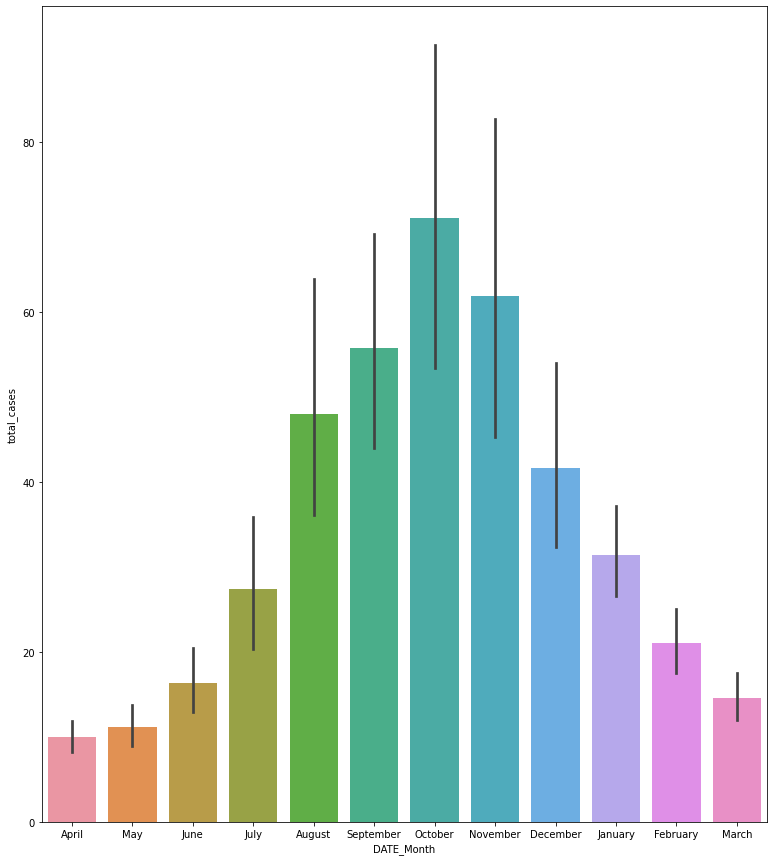

In [0]:
plt.figure(figsize= [13,15])

sns.barplot(x='DATE_Month',y='total_cases',data=df_sj,)

it is clear that during the spring and summertime the total cases of diseases are increasing which shows that there is a strong correlation with temperature and total cases. and by decreasing the temperature the total cases are decreasing too.

# Analysing the total cases in the city if iq

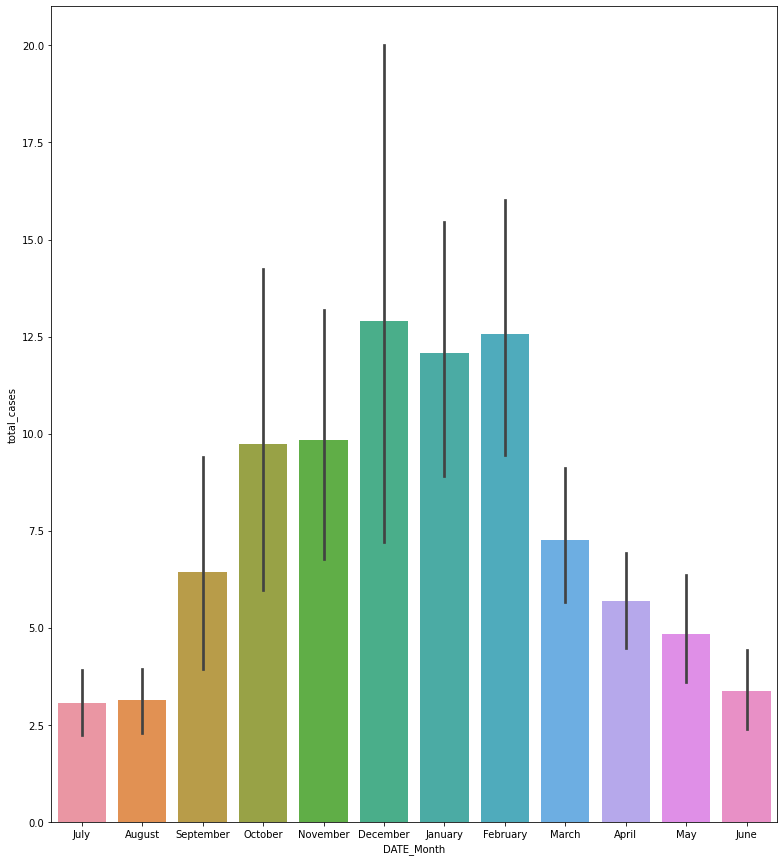

In [0]:
plt.figure(figsize= [13,15])

sns.barplot(x='DATE_Month',y='total_cases',data=df_iq,)

it is clear that during the spring and summertime the total cases of diseases are increasing which shows that there is a strong correlation with temperature and total cases. and by decreasing the temperature the total cases are decreasing too.

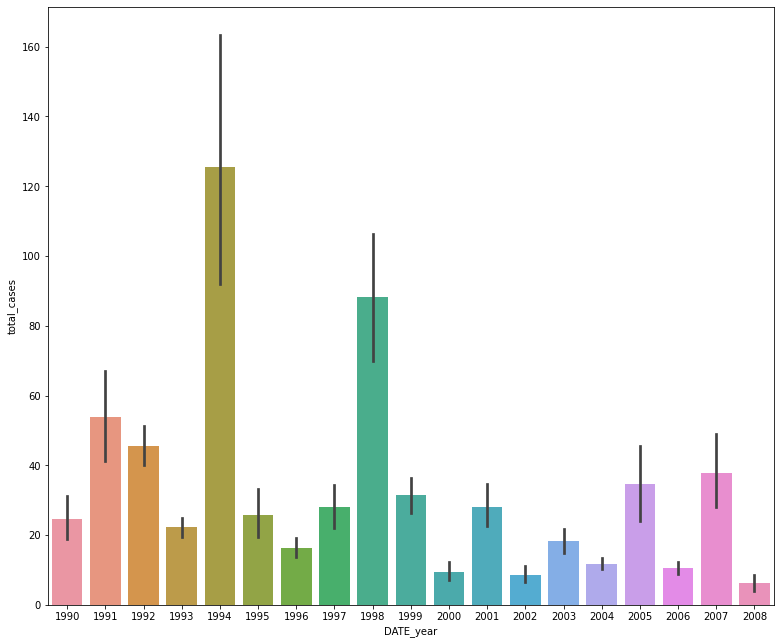

In [0]:
plt.figure(figsize= [13,11])
sns.barplot(x='DATE_year',y='total_cases',data=df_sj)

In the city of SJ in 1994 and 1998 the total cases had the highest number and in comparison, in 2000,2002,2004 and 2008 the total cases had the lowest number. Also there was no deases in 2009 and 2010 in this city

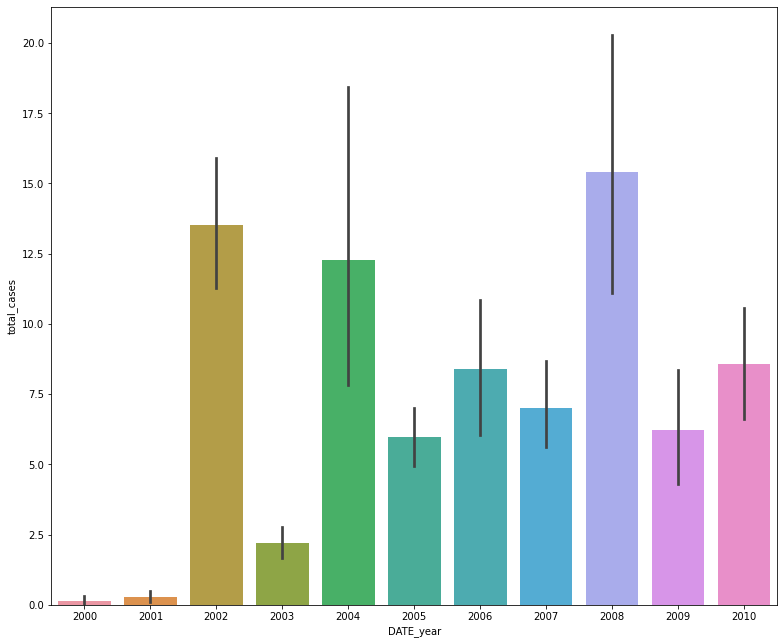

In [0]:
plt.figure(figsize= [13,11])
sns.barplot(x='DATE_year',y='total_cases',data=df_iq)

Interestingly in the city of IQ, there was no disease until 2000, which even in this year and a year later the total cases were very low but sharply it increased in 2002 which was around 14 but it decreased a year later, however from 2004 to 2010 the total cases had a fluctuation around 8 to  16 cases. In comparison, to the city of SJ diseases started from 2000 to 2010

# Interactive Graphs

In [36]:
import plotly.express as px
new_df_sj = new_df.copy()
fig = px.bar(new_df_sj,
             y="DATE_Month",
             x="total_cases",
             animation_frame="year",
             orientation='h',
             range_x=[0, new_df_sj.total_cases.max()],
             range_y = [0,11],
             )

fig.update_layout(width=1300,
                  height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_text='Evolution of Natural Disasters',
                  showlegend=False)
fig.update_xaxes(title_text='total_cases of Disease')
fig.update_yaxes(title_text='')
fig.show()

In [37]:
import plotly.express as px
# df = px.data.gapminder()
df = new_df.copy()
fig = px.scatter(
    df,
    x="reanalysis_air_temp_k",
    y="total_cases",
    animation_frame="year",
    size="total_cases",
    
    # color="DATE_Month",
    hover_name="DATE_Month",
    log_x=True,
    size_max=70,
    
    range_x=[df.reanalysis_air_temp_k.min(),df.reanalysis_air_temp_k.max()],
    range_y=[df.total_cases.min(), df.total_cases.max()]
    # range_y=[0, df.total_cases.max()],

    #   color_continuous_scale=px.colors.sequential.Emrld
)
fig.update_layout(width=1000,
                  height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')


In [0]:
iq=df_iq[['total_cases','DATE_Month']]
iq=np.round(iq.groupby('DATE_Month').mean())

sj=df_sj[['total_cases','DATE_Month']]
sj=np.round(sj.groupby('DATE_Month').mean())

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
# df = px.data.tips()
fig = go.Figure(go.Sunburst(
    labels=["sj", "iq", "July", "January","April", "October","September","August","November","February","June","March", "December", "May", 
            "July", "January","April", "October","September","August","November","February","March","June","December","May"],


    parents=["", "", "sj", "sj","sj","sj","sj","sj","sj","sj","sj","sj","sj","sj", 
             'iq', 'iq','iq','iq','iq', 'iq','iq','iq','iq','iq','iq','iq'],

      values=np.append(sj.values,iq.values),


    marker=dict(colors=px.colors.sequential.Emrld)),
                layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)',
                                 plot_bgcolor='rgba(0,0,0,0)'))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0),
                  title_text='Total case based on the city')
fig.show()